# Preparation for ML

In [1]:
# For multiple output per cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import plotly.graph_objects as go

In [3]:
DATASET_FOLDER = "../../datasets/"
#!ls $DATASET_FOLDER

In [5]:
df = pd.read_csv(DATASET_FOLDER + "emdat_with_precipitation.csv")

In [7]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Entry Criteria', 'Country', 'ISO', 'Region', 'Continent',
       'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time',
       'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Rainfall-MM'],
      dtype='object')

In [33]:
df_prep = df[["Rainfall-MM", "Total Deaths"]]
df_prep.corr()
X = df_prep["Rainfall-MM"].to_numpy()
Y = df_prep["Total Deaths"].to_numpy()

,Rainfall-MM,Total Deaths
Rainfall-MM,1.000000,-0.010206
Total Deaths,-0.010206,1.000000


In [14]:
#!pip install matplotlib scikit-learn

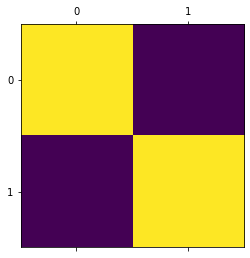

In [12]:
import matplotlib.pyplot as plt

plt.matshow(df_keep.corr())
plt.show()

In [41]:
X.reshape(-1, 1).shape

(4509, 1)

In [51]:
from sklearn import preprocessing

scaler_rain = preprocessing.MinMaxScaler().fit(X.reshape(-1, 1))
X_rain = scaler_rain.transform(X.reshape(-1, 1))
X_rain
scaler_death = preprocessing.MinMaxScaler().fit(Y.reshape(-1, 1))
Y_death = scaler_death.transform(Y.reshape(-1, 1))
Y_death

array([[0.08085302],
       [0.03058274],
       [0.2592411 ],
       ...,
       [0.23776995],
       [0.05092081],
       [0.1310578 ]])

array([[1.35135172e-06],
       [           nan],
       [           nan],
       ...,
       [1.89189240e-06],
       [1.08108137e-06],
       [           nan]])

In [52]:
X_rain.squeeze().max()

1.0

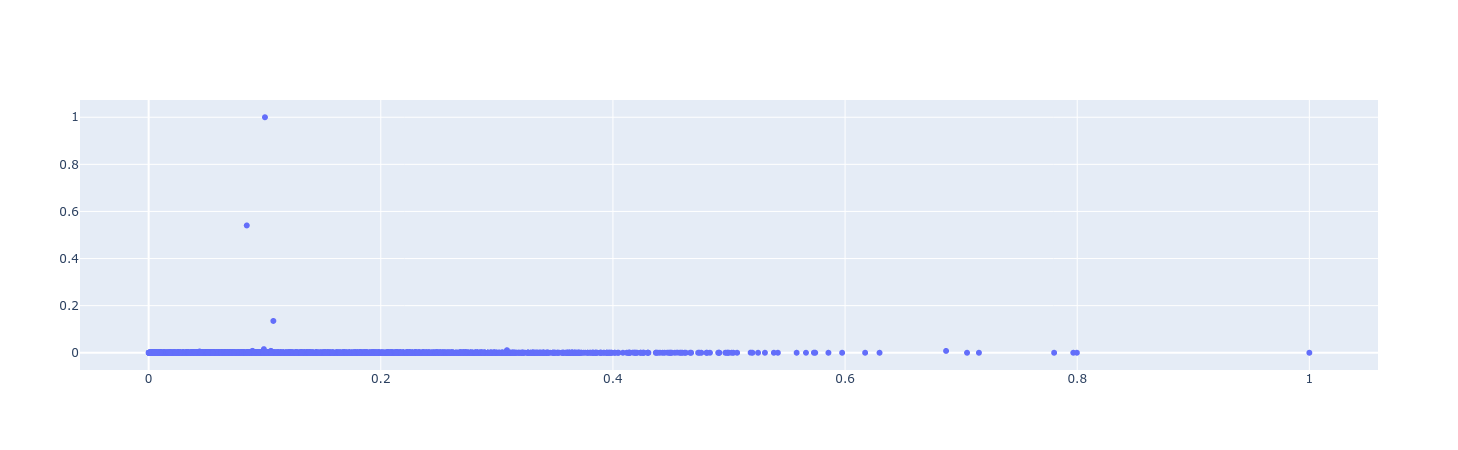

In [53]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(name="X vs Y", x=X_rain.squeeze(), y=Y_death.squeeze(), mode="markers")
)
# fig.add_trace(go.Scatter(name='line of best fit', x=X, y=df['bestfit'], mode='lines'))

# plotly figure layout
# fig.update_layout(xaxis_title = 'X', yaxis_title = 'Y')

# fig.show()